# Customer Churn Prediction

### Importing required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
data=pd.read_csv('tel-data.csv')

In [25]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
df=data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [30]:
df.head()
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [31]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [34]:
# Seeing the rows which have no values of Total Charges
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

(11, 20)

In [35]:
# viewing shape of that data, 
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape # only 11 rows have no value for TotalCharges

(11, 20)

In [36]:
df.iloc[488] # as you can see 

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [40]:
# Storing data without those blank values
df1=df[df.TotalCharges !=' ']
df.shape

(7043, 20)

In [41]:
# After dropping blank rows
df1.shape

(7032, 20)

In [42]:
# We have to Change data type of TotalCharges
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-42-79a7d4a54d1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [43]:
df1.TotalCharges.dtype

dtype('float64')

In [45]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Visualizing Data


In [50]:
# Here we are going to analyze the customer churn w.r.t customer tenure
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure


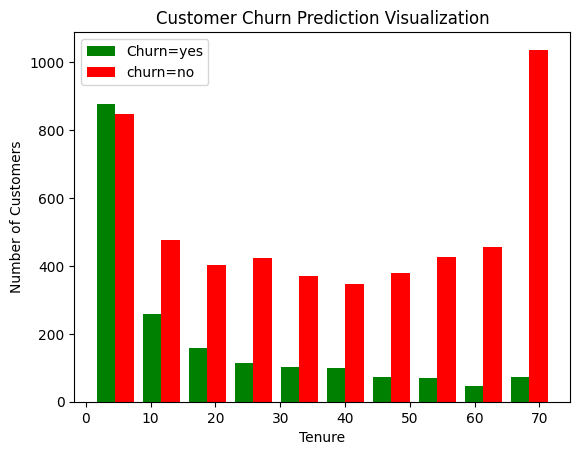

In [56]:
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'],label=['Churn=yes', 'churn=no'])
plt.legend()

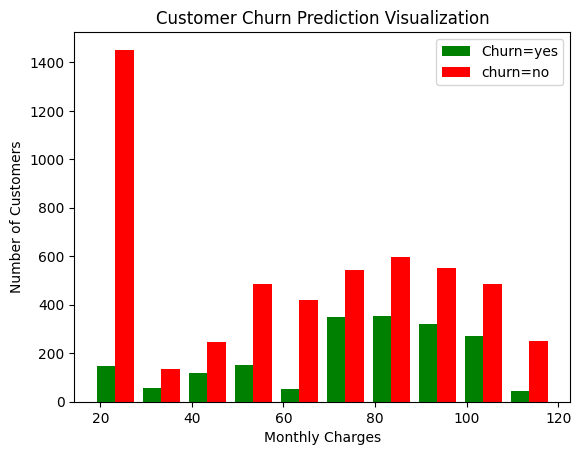

In [58]:
MC_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
MC_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([MC_churn_yes, MC_churn_no], color=['green','red'],label=['Churn=yes', 'churn=no'])
plt.legend()

In [59]:
def print_unique_col_val(df):
  for column in df:
    if df[column].dtype == 'object':
      print(f'{column}:{df[column].unique()}')


In [60]:
print_unique_col_val(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [61]:
df1.replace('No internet service','No',inplace=True)

<ipython-input-61-6ec62bd94ef0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [62]:
df1.replace('No phone service','No',inplace=True)

<ipython-input-62-1b1036926b6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [63]:
yes_no_columns = ['Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [65]:
for col in yes_no_columns:
  df1[col].replace({'Yes':1, 'No':0}, inplace= True)


<ipython-input-65-7d9a60190cfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0}, inplace= True)


In [67]:
for col in df1:
  print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [69]:
df1['gender'].replace({'Female':1, 'Male':0},inplace=True)

<ipython-input-69-7b4ac7981e4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0},inplace=True)


In [70]:
df1['gender'].unique()

array([1, 0])

In [72]:
#One hot encoding
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod' ])

In [73]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [74]:
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6276,1,0,1,1,15,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5960,1,1,0,0,62,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [75]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [77]:
# scalling values
col_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[col_scale] = scaler.fit_transform(df2[col_scale])

In [78]:
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
97,0,0,0,0,0.056338,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
984,1,0,1,1,1.000000,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [79]:
for col in df2:
  print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [82]:
# Splitting data set into train and test set
x=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 5)

In [85]:
X_train.shape

(5625, 26)

In [86]:
y_train.shape

(5625,)

### Developing Model

In [96]:
# Defining and Implementing Model
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (26,), activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
176/176 [==============================] - 1s 2ms/step - loss: 0.5051 - accuracy: 0.7520
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.7904
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7970
Epoch 4/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4196 - accuracy: 0.8018
Epoch 5/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8016
Epoch 6/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8071
Epoch 7/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4138 - accuracy: 0.8069
Epoch 8/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4121 - accuracy: 0.8075
Epoch 9/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4108 - accuracy: 0.8089
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8076

In [97]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7939


[0.44086188077926636, 0.7938876748085022]

In [98]:
yp=model.predict(X_test)

44/44 [==============================] - 1s 7ms/step


In [99]:
yp[:5]

array([[0.1815924 ],
       [0.42241475],
       [0.01049545],
       [0.7422097 ],
       [0.53073126]], dtype=float32)

In [100]:
# Actual values
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [101]:
# Function to convert values to 0 or 1
y_pred = []
for element in yp:
  if element> 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [102]:
# values predicted by Model
y_pred[:5]

[0, 0, 0, 1, 1]

### Confusion matrix to evaluate model performance

In [103]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       999
           1       0.67      0.58      0.62       408

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

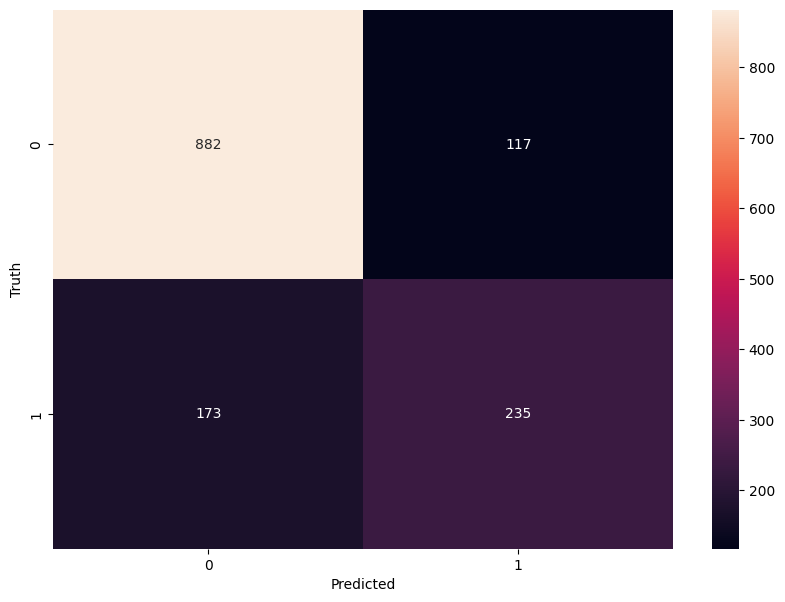

In [105]:
import seaborn as sns 
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')